
<font color='blue'>Привет, Иван! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<font color='blue' size=3><b>Комментарий ревьюера 3</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется.</font>

<font color='blue' size=3><b>Комментарий ревьюера 4</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется.</font>

# Описание проекта

Данные находятся в трёх файлах:
- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

# Инструкция по выполнению проекта

1. Подготовьте данные
- Откройте файлы и изучите их
- Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
- Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
- Проведите предобработку данных.
2. Проанализируйте данные
- Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
- Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
- Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
3. Постройте модель
- Напишите функцию для вычисления итоговой sMAPE.
- Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b>Приветствую! Понимаю, что направил проект на проверку до его завершения, но это вынежденно. Не могу понять, в чем заключается моя ошибка. Вроде бы NAN'ы заполнил ffill'ом, но на этапе построения модели - результаты все равно NAN'ы. Очень прошу помочь и подсказать, что я пропустил, где ошибся. Заранее благодарен.
</div>

<font color='purple'><b>Комментарий студента V2: Павел, привет! Долго голову ломал, что делать и решил немного проект перелопатить, извини =).</b></font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

# 1. Подготовка данных

**Импортируем необходимые библиотеки, откроем файлы и взглянем на имеющиеся данные.**

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, сгрупированы по функциональности. Можно ещё разделить группы пустой строкой.</font>

<font color='purple'><b>Комментарий студента V2: Вот так?</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Всё что import можно объединить в одну группу, это всё базовые библиотеки.</font>

In [2]:
# gold_train = pd.read_csv("C:/Users/user/Desktop/gold_recovery_train_new.csv", index_col=0)
# gold_test = pd.read_csv("C:/Users/user/Desktop/gold_recovery_test_new.csv", index_col=0)
# gold_full = pd.read_csv("C:/Users/user/Desktop/gold_recovery_full_new.csv", index_col=0)

In [3]:
gold_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv' , index_col=0)
gold_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv', index_col=0)
gold_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv', index_col=0)

<font color='blue'><b>Комментарий ревьюера 4 : </b></font> ⚠️\
<font color='darkorange'>Используй try: except: для разных вариантов загрузки!</font>

<font color='purple'><b>Комментарий студента V2: Добавил index_col=0.</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Классно, что сразу объявляешь 'date' индексом.</font>

In [4]:
gold_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [6]:
gold_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [8]:
gold_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

**Проверим корректность расчета эффективности обогащения, вычислите её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака**

In [10]:
C = gold_train["rougher.output.concentrate_au"]
F = gold_train["rougher.input.feed_au"]
T = gold_train["rougher.output.tail_au"]

In [11]:
gold_train["rougher.output.recovery.calculated"] = (C * (F - T)) / (F * (C - T)) * 100

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

In [12]:
mae = (gold_train["rougher.output.recovery.calculated"] - gold_train["rougher.output.recovery"]).abs().sum() / len(gold_train)
print("MAE", ":", mae)

MAE : 9.73512347450521e-15


In [13]:
gold_train = gold_train.drop("rougher.output.recovery.calculated", axis= 1)

**Показатель MAE очень мал, из чего можно сделать вывод, что расчеты верны.**

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

**Проанализируем признаки, недоступные в тестовой выборке. Выясним, что это за параметры и к какому типу относятся?**

In [14]:
no_need = set(gold_train.columns)-set(gold_test.columns)
no_need

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

**Полученные параметры являются результатами степени обработки металлов на разных этапах. Тестовая выборка содержит в себе результаты до начала обработки.**

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

**Проведем предобработку данных.**

In [15]:
display(gold_test.duplicated().sum())

0

In [16]:
display(gold_train.duplicated().sum())

0

In [17]:
display(gold_full.duplicated().sum())

0

In [18]:
display(gold_test.isna().sum()[gold_test.isna().sum() > 0])

primary_cleaner.input.sulfate                4
primary_cleaner.input.depressant             5
primary_cleaner.input.xanthate               4
rougher.input.feed_rate                      3
rougher.input.feed_size                      1
rougher.input.feed_sol                      21
rougher.input.floatbank10_sulfate            5
rougher.input.floatbank11_sulfate            8
rougher.input.floatbank11_xanthate          25
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.floatbank2_b_air     2
secondary_cleaner.state.floatbank3_a_air     9
dtype: int64

In [19]:
display(gold_train.isna().sum()[gold_train.isna().sum() > 0])

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.tail_pb                          100
final.output.tail_sol                           5
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 62, dtype: int64

In [20]:
display(gold_full.isna().sum()[gold_full.isna().sum() > 0])

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.tail_ag                            1
final.output.tail_pb                          101
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 63, dtype: int64

In [21]:
gold_test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [22]:
gold_train.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [23]:
gold_full.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

**Заполнение пропусков медианой или средним значением может привести к искажению данных, поэтому применим способ ffill, заполнив пропуски предыдущим и следующим значением**

In [24]:
gold_test.fillna(method='ffill', inplace=True)

In [25]:
gold_train.fillna(method='ffill', inplace=True)

In [26]:
gold_full.fillna(method='ffill', inplace=True)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

# 2. Анализ данных

**Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки**

<font color='purple'><b>Комментарий студента V2: Тут решил для удобства создать переменные и построить немного иную гистограмму.</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

**Создадим переменные концентрации металлов и простроим гистограмму для отображения изменения концетрации на каждом этапе очистки**

In [27]:
rougher_input = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_au','rougher.input.feed_sol']
rougher_output = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_au','rougher.output.concentrate_sol']
primary_cleaner = ['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_sol']
final_output = ['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_au','final.output.concentrate_sol']
name = ['Серебро','Свинец','Золото']

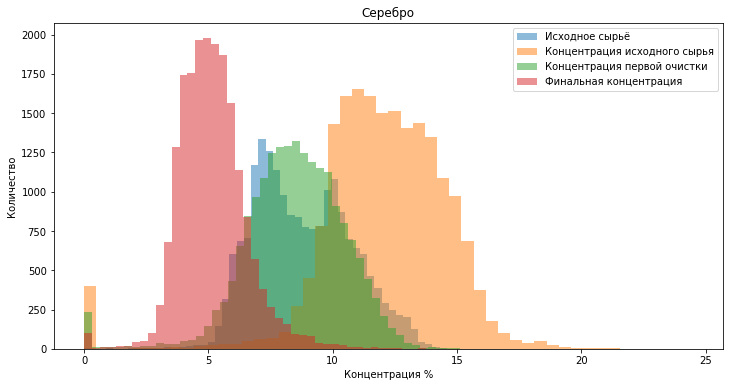

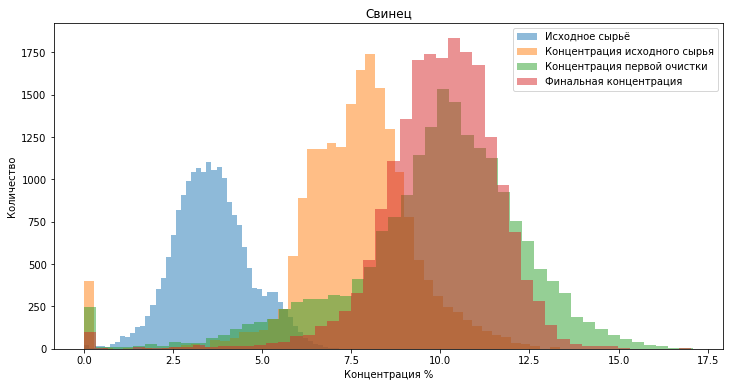

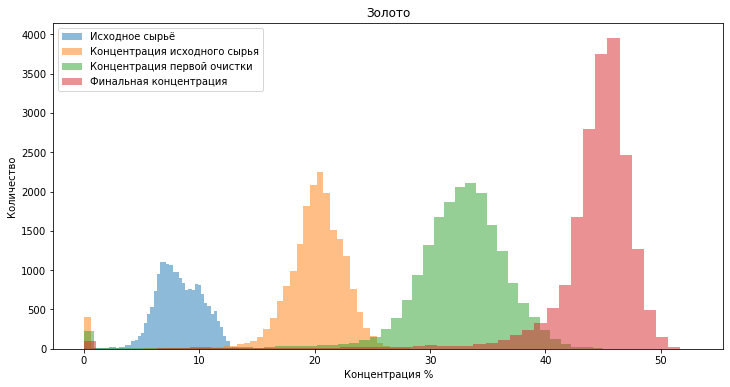

In [28]:
def hist_metal(r_input, output, primary, final, name): 
    plt.figure(figsize=(12, 6))
    plt.hist(r_input, bins=50, alpha=0.5, label='Исходное сырьё')
    plt.hist(output, bins=50, alpha=0.5, label='Концентрация исходного сырья')
    plt.hist(primary, bins=50, alpha=0.5, label='Концентрация первой очистки')
    plt.hist(final, bins=50, alpha=0.5, label='Финальная концентрация')
    plt.title(name)
    plt.xlabel('Концентрация %')
    plt.ylabel('Количество')
    plt.legend()
    plt.show()
for i in range(3):
    hist_metal(gold_full[rougher_input[i]],gold_full[rougher_output[i]],gold_full[primary_cleaner[i]],gold_full[final_output[i]],name[i])

**Концентрация Золота равномерно увеличивается на протяжении всей стадии очистки. Концентрация Серебра увеличивается и немного уменьшается на протяжении всей стадии, что приводит к общему снижению. Концентрация Свинца незначительно увеличивается на протяжении всей стадии, что приводит к чистому увеличению, аналогичному концентрату на этапе первичной очистки.**

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Всё верно!</font>

**Сравните распределения размеров гранул сырья на обучающей и тестовой выборках.**

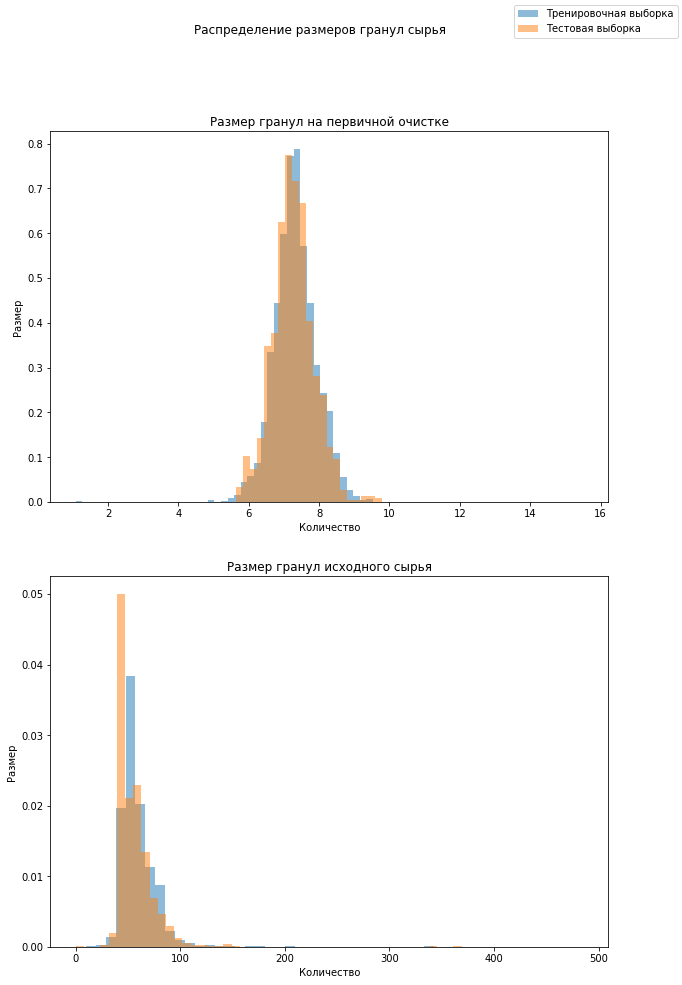

In [29]:
fig, axes = plt.subplots(2,1, figsize=(10, 15))
axes[0].hist(gold_train["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].hist(gold_test["primary_cleaner.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[0].set(title="Размер гранул на первичной очистке", xlabel="Количество", ylabel="Размер")
axes[1].hist(gold_train["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].hist(gold_test["rougher.input.feed_size"], density=True, alpha=0.5, bins=50)
axes[1].set(title="Размер гранул исходного сырья", xlabel="Количество", ylabel="Размер")
fig.suptitle("Распределение размеров гранул сырья")
fig.legend(["Тренировочная выборка", "Тестовая выборка"])
fig.show()

**Распределение размеров гранул сырья показывает, что существенного отличия размеров в тренировочной и тестовой выборках нет. Следовательно, оценка модели может быть правильной.**

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Вывод верный!</font>

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

In [30]:
def raw_feed(df):
    return df["rougher.input.feed_au"] + df["rougher.input.feed_ag"] + df["rougher.input.feed_pb"] + df["rougher.input.feed_sol"]

<font color='blue'><b>Комментарий ревьюера : </b></font> ⚠️\
<font color='darkorange'> Старайся разбивать код на строчки так, что бы всё было перед глазами. По стандарту строка кода не должна превышать 79 символов.</font>

In [31]:
def rougher_conc(df):
    return df["rougher.output.concentrate_au"] + df["rougher.output.concentrate_ag"] + df["rougher.output.concentrate_pb"] + df["rougher.output.concentrate_sol"]

In [32]:
def final_conc(df):
    return df["final.output.concentrate_au"] + df["final.output.concentrate_ag"] + df["final.output.concentrate_pb"] + df["final.output.concentrate_sol"]

In [33]:
gold_train["rougher.input.feed"] = raw_feed(gold_train)
gold_train["rougher.output.concentrate"] = rougher_conc(gold_train)
gold_train["final.output.concentrate"] = final_conc(gold_train)
total_conc = gold_train[["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


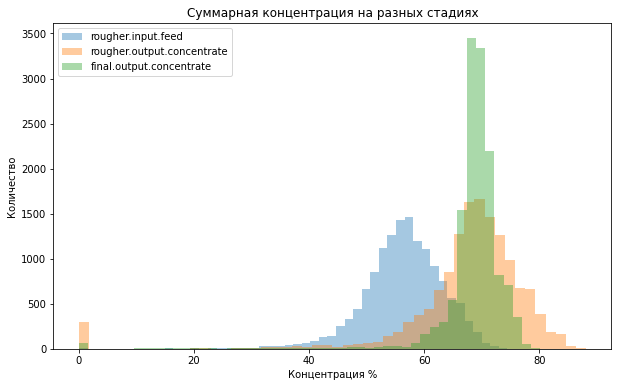

In [34]:
fig = plt.figure(figsize=(10, 6))
for column in list(total_conc):
    sns.distplot(total_conc[column], kde=False)
plt.legend(list(total_conc))
plt.title("Суммарная концентрация на разных стадиях")
plt.xlabel("Концентрация %")
plt.ylabel("Количество")
fig.show()

<font color='blue'><b>Комментарий ревьюера 4: </b></font> ✔️\
<font color='blue'>`distplot` в следующих версиях поддерживаться не будет, советуют переходить на `displot` или `histplot` для сохранения работоспособности кода. </font>

**Все распределения концентрации на различных стадиях показывают аномальные значения при 0%. Поэтому стоит удалить эти значения из обеих выборок (< 20%), чтобы обеспечить точность модели.**

In [35]:
gold_train = gold_train[gold_train["rougher.input.feed"] > 20]  
gold_train = gold_train[gold_train["rougher.output.concentrate"]> 20] 
gold_train = gold_train[gold_train["final.output.concentrate"] > 20]
gold_train.shape

(13741, 89)

In [36]:
targets = ['rougher.output.recovery', 'final.output.recovery']
target_test = gold_full[targets].loc[gold_full.index.intersection(gold_test.index),:]
target_test.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078


In [37]:
target_train = gold_train[targets]
target_train.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-01-15 00:00:00,87.107763,70.541216
2016-01-15 01:00:00,86.843261,69.266198
2016-01-15 02:00:00,86.842308,68.116445
2016-01-15 03:00:00,87.226430,68.347543
2016-01-15 04:00:00,86.688794,66.927016


In [38]:
gold_train = gold_train.drop(no_need, axis=1)
gold_train = gold_train.drop(total_conc.columns, axis=1)

**Уберем нулевые значения**

In [39]:
gold_train.shape

(13741, 52)

In [40]:
# gold_train = gold_train[gold_train[rougher_input].sum(1)>0]

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'><s> Выбросы нужно почистить в обучающих данных.</s></font>

<font color='purple'><b>Комментарий студента V3: Павел, извини, не мог бы подсказать как правильно сделать? а то сегодня дедлайн, боюсь накосячить еще больше, голова и так уже не варит.</b></font>

<font color='purple'><b>Комментарий студента V4: Павел, подскажи пожалуйста, сейчас верно? </b></font>

<font color='blue'><b>Комментарий ревьюера 4: </b></font> ✔️\
<font color='green'>Сейчас верно.</font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> \
<font color='blue'>Проще всего Заменить все `gold_full` на `gold_train` в этом блоке, но для этого нужно сделать удаление ненужных столбцов из gold_train(ячейка 14), позже этого блока (Исследуем суммарную концентрацию...), и переназначить таргеты (ячейка 18) .</font>

In [41]:
print(gold_train[rougher_input].shape)

(13741, 4)


In [42]:
# display(gold_train[gold_train[rougher_input].sum(1)==0][rougher_input].count())
# gold_test[gold_test[rougher_input].sum(1)==0][rougher_input].count()

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Обрати внимание на нулевые и около нулевые значения концентраций. Это явная аномалия. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения нужно удалить из данных.\
Модель планируется использовать для подбора параметров оборудования, поэтому примеры со сбоями не интересные для моделирования.</s></font>

# 3. Построение модели

<font color='purple'><b>Комментарий студента V2: Тут тоже поизучал разные варианты и пришел к немного другому решению.</b></font>

**Напишем функцию для вычисления итоговой sMAPE**

In [51]:
def smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='orange'> Цикл сильно тормозит вычисления. Для суммы в Pyhton есть отличные методы!</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> `smape` расчитана верно.</font>

In [44]:
features_train = gold_train.reset_index(drop=True) 
target_train = target_train.reset_index(drop=True)
features_test = gold_test.reset_index(drop=True) 
target_test = target_test.reset_index(drop=True) 
target_train_rougher = target_train['rougher.output.recovery']
target_train_final = target_train['final.output.recovery']
target_test_rougher = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']

In [45]:
smape_score = make_scorer(smape, greater_is_better=False)
cv = KFold(n_splits=3)

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

**Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке**

**Линейная регрессия**

In [46]:
lr = LinearRegression()

rougher_smape = cross_val_score(lr, features_train, target_train_rougher, scoring = smape_score, cv=cv)
final_smape = cross_val_score(lr, features_train, target_train_final, scoring = smape_score, cv=cv)
smape_weighted = 0.25 * rougher_smape.mean() + 0.75 * final_smape.mean()

print(f' sMAPE исходной концентрации: {rougher_smape.mean()}')
print(f' Финальное sMAPE: {final_smape.mean()}')
print(f' Итоговое sMAPE:{smape_weighted}')

 sMAPE исходной концентрации: -10.475530807623933
 Финальное sMAPE: -13.532403396283959
 Итоговое sMAPE:-12.768185249118952


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отлично, что оценка по целевой метрике!</font>

**Дерево решений**

In [47]:
dtr = DecisionTreeRegressor(random_state=12345)
 
parametrs = {'max_depth': range (1,10)}
 
rougher_smape = GridSearchCV(dtr, parametrs, scoring=smape_score, cv=cv, n_jobs=4)
rougher_smape.fit(features_train, target_train_rougher)

print(f'sMAPE исходной концентрации: {rougher_smape.best_score_}')
print(f'Гиперпараметры: {rougher_smape.best_params_}')
 
final_smape = GridSearchCV(dtr, parametrs, scoring=smape_score, cv=cv, n_jobs=4)
final_smape.fit(features_train, target_train_final)
 
print(f'sMAPE исходной концентрации: {final_smape.best_score_}' )
print(f'Гиперпараметры: {final_smape.best_params_}')
smape_weighted = 0.25 * rougher_smape.best_score_ + 0.75 * final_smape.best_score_

print("Итоговый sMAPE:", smape_weighted)

sMAPE исходной концентрации: -8.106184371656886
Гиперпараметры: {'max_depth': 2}
sMAPE исходной концентрации: -9.90048702420814
Гиперпараметры: {'max_depth': 2}
Итоговый sMAPE: -9.451911361070326


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

**Случайный лес**

In [ ]:
rfr = RandomForestRegressor(random_state=12345)
 
parametrs = {'n_estimators': range (10, 71, 10),  'max_depth': range (1,4)}       
 
rougher_smape = GridSearchCV(rfr, parametrs, scoring=smape_score, cv=cv, n_jobs=4)
rougher_smape.fit(features_train, target_train_rougher)
 
print(f'sMAPE исходной концентрации: {rougher_smape.best_score_}')
print(f'Гиперпараметры: {rougher_smape.best_params_}')
 
final_smape = GridSearchCV(rfr, parametrs, scoring=smape_score, cv=cv, n_jobs=4)
final_smape.fit(features_train, target_train_final)
 
print(f'sMAPE исходной концентрации: {final_smape.best_score_}' )
print(f'Гиперпараметры: {final_smape.best_params_}')
smape_weighted = 0.25 * rougher_smape.best_score_ + 0.75 * final_smape.best_score_

print("Итоговый sMAPE:", smape_weighted)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

**Лучшая модель - Случайный лес, проверим ее качество на тестовой выборке**

In [48]:
test_model_rougher = RandomForestRegressor(random_state=12345, max_depth=2, n_estimators=10)
rf = test_model_rougher.fit(features_train, target_train_rougher) 
predictions_rougher = rf.predict(features_test) 
res_rougher = smape(target_test_rougher, predictions_rougher)
print(res_rougher)
 
test_model_final = RandomForestRegressor(random_state=12345, max_depth=1, n_estimators=30)
rff = test_model_final.fit(features_train, target_train_final) 
predictions_final = rff.predict(features_test)  
res_final = smape(target_test_final, predictions_final)
print(res_final)
smape_weighted_final = 0.25 * res_rougher + 0.75 * res_final
print("Итоговый sMAPE:", smape_weighted_final)

8.393357855754441
9.551294407781121
Итоговый sMAPE: 9.26181026977445


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

**Проверим модель на адекватность при помощи DummyRegressor'а**

In [53]:
dr_r = DummyRegressor(strategy = "median")
predict_r = dr_r.fit(features_train, target_train_rougher).predict(features_test)
smape_r = smape(predict_r, np.array(target_test_rougher))

dr_f = DummyRegressor(strategy = "median")
predict_f = dr_f.fit(features_train, target_train_final).predict(features_test)
smape_f = smape(predict_f, np.array(target_test_final))

smape_weighted_dummy = 0.25 * smape_r + 0.75 * smape_f
print('DR SMAPE:', smape_weighted_dummy)

DR SMAPE: 9.441911631456723


<font color='purple'><b>Комментарий студента V3: Павел, проверил адекватность модели, надеюсь, что правильно. Юпитер сегодня очень медленно работает и постоянно выдает ошибки без причины. Если сверхкритических замечаний больше нет, не мог бы зачесть проект, а то за дедлайн переживаю? И еще, посоветуй пожалуйста, есть ли среда постабильней Юпитера? Постоянно перезапускать ядра и ячейки очень мешает продуктивной работе. Заранее благодарен </b></font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'> Наивная модель применена правильно, но пока она выигрывает по метрике у нашей лучшей модели.

<font color='blue'><b>Комментарий ревьюера 3: </b></font> \
<font color='blue'>Если под Юпитером ты имеешь ввиду JupyterHub, то можно попробовать кодить в Колабе Гугла, он пошустрее и понадёжней.</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'><s> Нужно сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</s></font>

# Вывод

-**В ходе исследования была обработаны данные по добыче с параметрами на разных этапах обработки сырья. Данные были проверены путем вычисления эффективности обогащения и подготовлены для анализа.**

-**С помощью sMAPE удалось обучить и проверить несколько моделей - Линейная регрессия, Дерево решений и Случайный лес. Лучшая модель - Случайный лес, ее качесво проверено на тестовой выборке.**

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера 4</b></font>\
<font color='green'>  Иван, проект принят! \
Все этапы пройдены. Все критичные рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'>Иван, большое спасибо за доработку. Появилась Наивная модель.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Попробуй обучить модели на очищенных от выбросов данных.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Иван, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Попробуй обучить модели на очищенных от выбросов данных.</font></ul>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='purple'><b>Комментарий студента V2: Павел, извини, проект переделывал в новом файле, без твоих комментариев, вернул, но хронолия может быть нарушена. .</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> В момент предполгаемого применения модели в продакте, доступны только признаки собранные в тестовом датасете. Нужно построить модель работающую только с этими признаками.  </font>

<font color='blue'><b>Комментарий ревьюера: </b></font> \
<font color='blue'>В функции метрики происхоят деления на ноль. Можно добавить небольшую константу в знаменатель.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>

<font color='blue'>К сожалению, проект не готов. Присылай законченную версию. По всем непонятным моментам можно обращаться за помощью наставникам и преподавателям, а также комьюнити студентов. Буду ждать :)

</font>